In [4]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [5]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


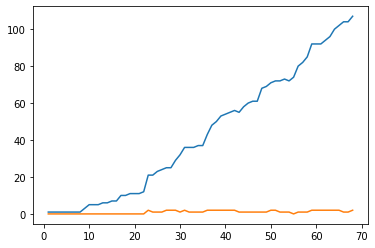

In [6]:
df1 = df[df['city']=='Ivinhema']
plt.plot(df1.day,df1.cases)
plt.plot(df1.day,df1.avg7_cases)
# plt.plot(df.day,df.deaths)

In [7]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
452434,2020-07-30,TO,Xambioá,city,562,8,75,False,11540,1722107,...,0.0,48.70,0.693,0.867,0.0,4,0,1.47,0.384,0.0
452435,2020-07-31,TO,Xambioá,city,562,8,76,False,11540,1722107,...,0.0,48.70,0.693,0.000,0.0,4,0,1.46,0.371,0.0
452436,2020-08-01,TO,Xambioá,city,565,8,77,False,11540,1722107,...,0.0,48.96,0.693,0.260,0.0,4,0,1.44,0.371,0.0
452437,2020-08-02,TO,Xambioá,city,565,8,78,False,11540,1722107,...,0.0,48.96,0.693,0.000,0.0,3,0,1.44,0.272,0.0
452438,2020-08-03,TO,Xambioá,city,565,8,79,True,11540,1722107,...,0.0,48.96,0.693,0.000,0.0,2,0,1.43,0.248,0.0


In [8]:
# df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
# df['date'] = df['date'].astype('datetime64[ns]')


In [18]:
df2 = df[(df['state']=='SP')]# and (df['place_type']=='state')]
# df2 = df2[(df2['place_type']=='state')]
df2 = df2[(df2['city']=='São Paulo')]
local = 'SP'
df2

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
436421,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023,3550308,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
436422,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023,3550308,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
436423,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023,3550308,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
436424,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023,3550308,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
436425,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023,3550308,...,0.0,0.000,0.000,0.000,0.000,0,0,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436569,2020-07-31,SP,São Paulo,city,197560,9549,149,False,12252023,3550308,...,5.0,16.125,0.779,0.316,0.006,3052,56,5.01,0.249,0.005
436570,2020-08-01,SP,São Paulo,city,199674,9619,150,False,12252023,3550308,...,-9.0,16.297,0.785,0.173,0.006,2937,59,4.96,0.240,0.005
436571,2020-08-02,SP,São Paulo,city,200444,9634,151,False,12252023,3550308,...,-55.0,16.360,0.786,0.063,0.001,2952,58,4.92,0.241,0.005
436572,2020-08-03,SP,São Paulo,city,200705,9644,152,False,12252023,3550308,...,-5.0,16.381,0.787,0.021,0.001,2668,57,4.88,0.218,0.005


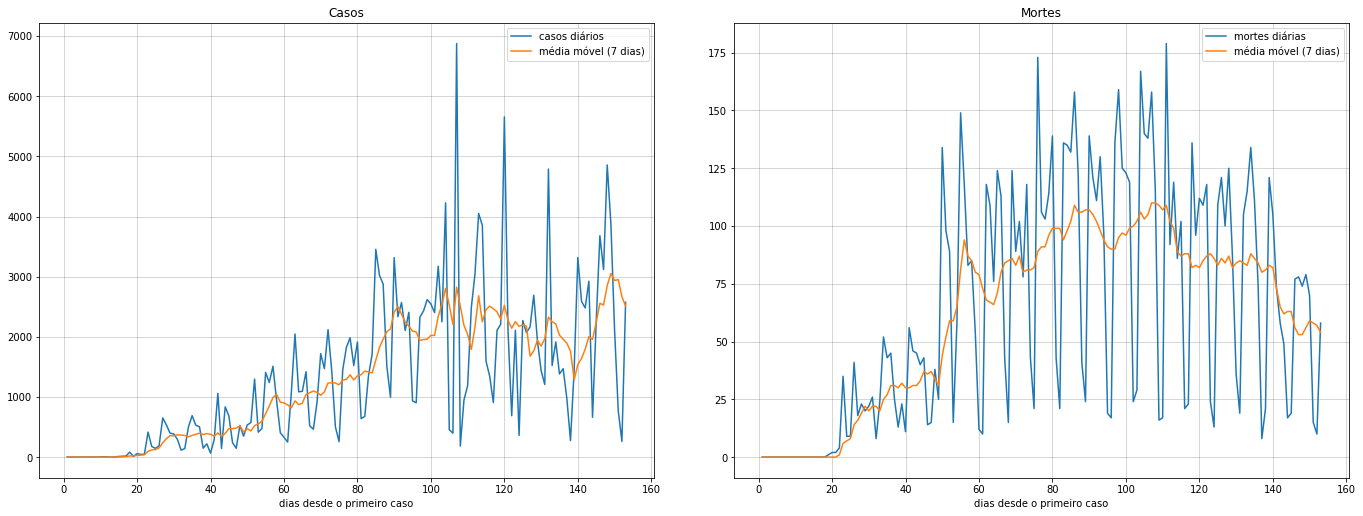

In [19]:
fig, ((ax3, ax4)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)


ax3.set_title("Casos")
ax3.set_xlabel("dias desde o primeiro caso")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df2.day, df2.case_day, label = 'casos diários')
ax3.plot(df2.day, df2.avg7_cases, label = 'média móvel (7 dias)')

ax4.set_title("Mortes")
ax4.set_xlabel("dias desde o primeiro caso")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df2.day, df2.death_day, label = 'mortes diárias')
ax4.plot(df2.day, df2.avg7_deaths, label = 'média móvel (7 dias)')

ax3.legend()
ax4.legend()


In [11]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')

In [12]:
ax3.set_title("Cases in Brazil")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.case_day, label = 'daily cases')
ax3.plot(df_br.day, df_br.avg7_cases, label = 'moving average')

ax4.set_title("Deaths in Brazil")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br.death_day, label = 'daily deaths')
ax4.plot(df_br.day, df_br.avg7_deaths, label = 'moving average')


NameError: name 'df_br' is not defined

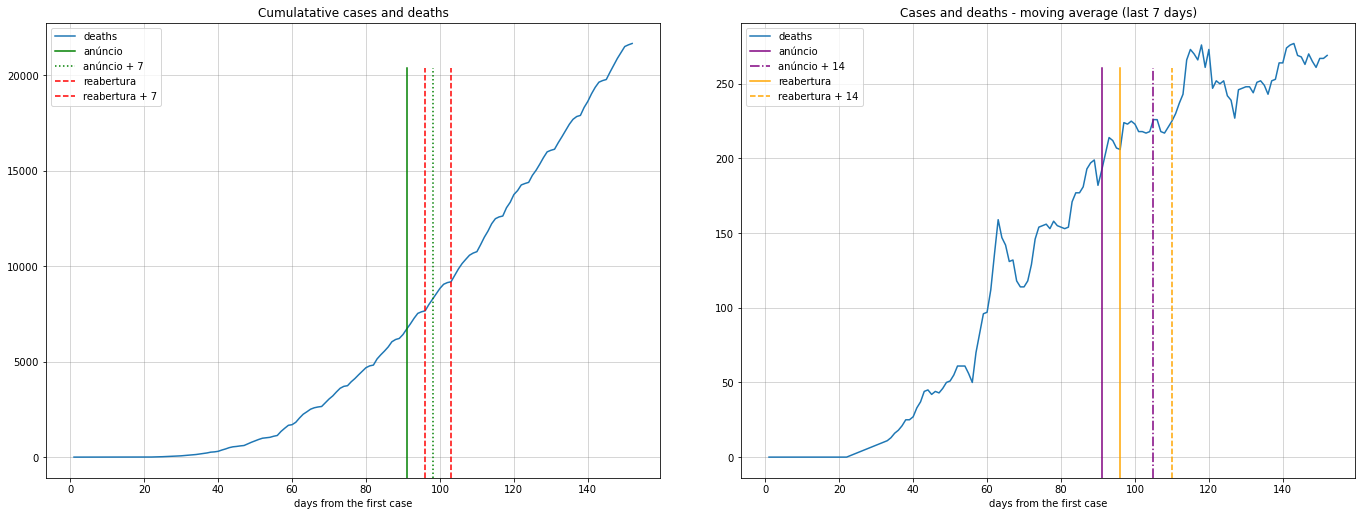

In [11]:

# Selected cities
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases and deaths")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases and deaths - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

dados = df[(df['state'] == 'SP') & (df['place_type']=='state')]

ax1.plot(dados.day, dados.cases, label = 'cases')
ax1.plot(dados.day, dados.deaths, label = 'deaths')
ax2.plot(dados.day, dados.avg7_cases, label = 'cases')
ax2.plot(dados.day, dados.avg7_deaths, label = 'deaths')

ax1.axvline(x=91, ymin=0, ymax=0.9, color = 'green', linestyle = '-',label = 'anúncio')
ax1.axvline(x=91+7, ymin=0, ymax=0.9, color = 'green', linestyle = ':',label = 'anúncio + 7')
ax1.axvline(x=96, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura')
ax1.axvline(x=96+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura + 7')

ax2.axvline(x=91, ymin=0, ymax=0.9, color = 'purple', linestyle = '-',label = 'anúncio')
ax2.axvline(x=91+14, ymin=0, ymax=0.9, color = 'purple', linestyle = '-.',label = 'anúncio + 14')
ax2.axvline(x=96, ymin=0, ymax=0.9, color = 'orange', linestyle = '-',label = 'reabertura')
ax2.axvline(x=96+14, ymin=0, ymax=0.9, color = 'orange', linestyle = '--',label = 'reabertura + 14')

ax1.legend()
ax2.legend()
# fig.savefig('../analysis/saoPaulo_cases_deaths.png')